# Identifying fake social media accounts
#### Author: Gitanjali Nair

In [192]:
import pandas as pd

#Load and visualize training data
f_data = pd.read_csv('train.csv')
#print(f_data.head())
print(f_data.shape)
f_data_features = f_data.iloc[:,:-1]
f_data_labels = f_data['fake']

#Load and visualize test data
f_test = pd.read_csv('test.csv')
#print(f_test.head())
print(f_test.shape)

(576, 12)
(120, 12)


In [130]:
# Split data into training and validation sets
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(f_data_features, f_data_labels, test_size=0.3,random_state=109) # 70% training and 30% validation
f_train = X_train.join(Y_train)
f_valid = X_valid.join(Y_valid)
print(f_train.shape)
X_train = np.array(X_train)
X_valid = np.array(X_valid)
Y_train = np.array(Y_train)
Y_valid = np.array(Y_valid)

(403, 12)


## Using SVM to classify 

### Using radial basis function (rbf) kernel 

In [131]:
from sklearn import svm
clf_rbf = svm.SVC()
clf_rbf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
Y_valid_pred = clf_rbf.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.6242774566473989


### Using linear kernel

In [133]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
Y_valid_pred = clf_linear.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.9132947976878613


### Using sigmoid kernel 

In [135]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
Y_valid_pred = clf_sigmoid.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.43352601156069365


In comparison with the radial basis function and the sigmoid model, the linear SVM model has the best accuracy on validation data. Hence, the linear model can be expected to give best results on the test data as well.

In [137]:
# Load test data
# Load X -> Features
X_test = f_test.iloc[:,:-1]
X_test = np.array(X_test)
print(type(X_test))
print(X_test.shape)
# Load Y -> Fake or not
Y_test = f_test['fake']
Y_test = np.array(Y_test)
print(type(Y_test))
print(Y_test.shape)

<class 'numpy.ndarray'>
(120, 11)
<class 'numpy.ndarray'>
(120,)


### Accuracy of SVM models on test data 

In [138]:
from sklearn import metrics

Y_pred_linear = clf_linear.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_linear))

Accuracy: 0.8833333333333333


In [139]:
Y_pred_rbf = clf_rbf.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rbf))

Accuracy: 0.6416666666666667


In [140]:
Y_pred_sigmoid = clf_sigmoid.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_sigmoid))

Accuracy: 0.475


As expected, the linear SVM model has the best accuracy on test data.

## Feature selection 

### Filtering features using the Pearson Correlation Heatmap 

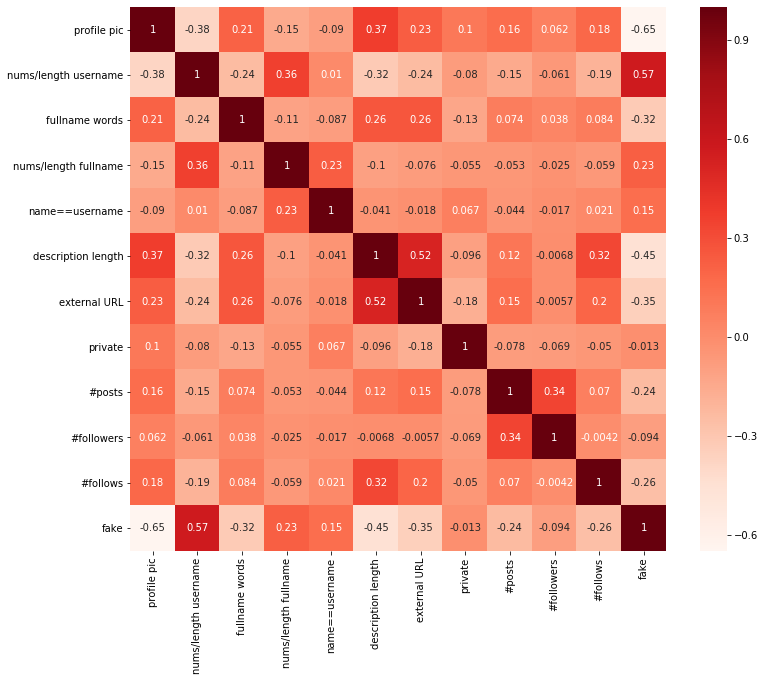

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = f_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [142]:
#Correlation with output variable
cor_target = abs(cor['fake'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


profile pic             0.648274
nums/length username    0.573076
fake                    1.000000
Name: fake, dtype: float64

The presence of a profile picture and the length of the username have the greatest correlation to the account being fake or not.

In [143]:
print(f_train[['profile pic','nums/length username']].corr())

                      profile pic  nums/length username
profile pic              1.000000             -0.381088
nums/length username    -0.381088              1.000000


It can be seen that profile pic and username length are not correlated, and hence these independent variables can be considered for the regression method.

In [144]:
X_train = f_train[['profile pic','nums/length username']]
print(X_train.head())
Y_train = f_train['fake']

     profile pic  nums/length username
63             1                  0.00
403            0                  0.00
151            1                  0.15
314            1                  0.88
511            0                  0.36


#### Linear SVM model 

In [145]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [146]:
X_valid = f_valid[['profile pic','nums/length username']]
print(X_valid.head())
X_valid = np.array(X_valid)
Y_valid_pred = clf_linear.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

     profile pic  nums/length username
215            1                  0.00
202            1                  0.00
282            1                  0.07
301            0                  0.00
452            1                  0.00
Accuracy: 0.8901734104046243


The linear SVM model's performance reduces when only specific features selected using the correlation matrix are considered.

#### Radial basis function model 

In [147]:
clf_rbf = svm.SVC()
clf_rbf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
Y_valid_pred = clf_rbf.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.8901734104046243


Radial basis function kernel has the same accuracy as that of the linear SVM model on validation data.

#### Sigmoid kernel model

In [149]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
Y_valid_pred = clf_sigmoid.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.8786127167630058


After feature selection as well, the sigmoid kernel has the lowest accuracy among other kernels. However, it is notable that the RBF and sigmoid models have significantly improved in accuracy after feature selection.

#### Accuracy of feature selected SVM models on test data 

In [151]:
from sklearn import metrics
X_test = f_test.iloc[:,:-1]
X_test = X_test[['profile pic','nums/length username']]
X_test = np.array(X_test)
print(X_test.shape)
Y_pred_linear = clf_linear.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_linear))

(120, 2)
Accuracy: 0.8666666666666667


In [152]:
Y_pred_rbf = clf_rbf.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rbf))

Accuracy: 0.875


In [153]:
Y_pred_sigmoid = clf_sigmoid.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_sigmoid))

Accuracy: 0.8583333333333333


Although the linear and rbf model had the same accuracy in the validation data after feature selection, the rbf model performs slightly better on the test data. 

### Embedded feature selection using Lasso regularization

This is the preferred feature selection method when the number of features are less than 20. In this method, the most irrelevant features are assigned a coefficient of 0.

In [154]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
X_train = f_train.iloc[:,:-1]
Y_train = f_train['fake']
reg.fit(X_train, Y_train)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,Y_train))
print(type(reg.coef_))
#reg.coef_ = (reg.coef_ - np.mean(reg.coef_)) / np.std(reg.coef_)
coef = pd.Series(reg.coef_, index = X_train.columns)
print(coef)

Best alpha using built-in LassoCV: 47.696988
Best score using built-in LassoCV: 0.066625
<class 'numpy.ndarray'>
profile pic            -0.000000e+00
nums/length username    0.000000e+00
fullname words         -0.000000e+00
nums/length fullname    0.000000e+00
name==username          0.000000e+00
description length     -0.000000e+00
external URL           -0.000000e+00
private                -0.000000e+00
#posts                 -0.000000e+00
#followers             -4.647385e-08
#follows               -8.280814e-05
dtype: float64


In [155]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 9 variables


The printed series shows that Lasso has selected features '#followers' and '#follows'

#### Training SVMs using the selected features 

In [156]:
X_train = f_train[['#followers','#follows']]
Y_train = f_train['fake']
X_valid = f_valid[['#followers','#follows']]
X_valid = np.array(X_valid)

#### Linear SVM model 

In [157]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, Y_train)
Y_valid_pred = clf_linear.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.815028901734104


#### RBF SVM model

In [158]:
clf_rbf = svm.SVC()
clf_rbf.fit(X_train, Y_train)
Y_valid_pred = clf_rbf.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.6011560693641619


#### Sigmoid SVM model

In [159]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, Y_train)
Y_valid_pred = clf_sigmoid.predict(X_valid[:,:])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_valid, Y_valid_pred))

Accuracy: 0.45664739884393063


The accuracy of all the three models is much lower when '#follows' and '#followers' are the selected features as against when 'profile pic' and 'nums/length of username' are selected as features. 

#### Accuracy of feature selected SVM models on test data 

In [160]:
from sklearn import metrics
X_test = f_test.iloc[:,:-1]
X_test = X_test[['#followers','#follows']]
X_test = np.array(X_test)
Y_pred_linear = clf_linear.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_linear))

Accuracy: 0.7583333333333333


In [161]:
Y_pred_rbf = clf_rbf.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rbf))

Accuracy: 0.575


In [162]:
Y_pred_sigmoid = clf_sigmoid.predict(X_test[:,:])
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_sigmoid))

Accuracy: 0.48333333333333334


The accuracy of the models on the test data show a similar pattern as on the validation data where the linear model performs best.

### Concluding remarks on SVM

The above experiments show that the SVM model has the best accuracy (88.33%) on test data when a linear kernel and all features are used for training. The radial basis function (rbf) and sigmoid kernel SVMs have a relatively poor performance. On filtering for relevant features using the Pearson Correlation Matrix, 'profile pic' and 'nums/length of username' are selected. Training the SVM models with a linear, an rbf and a sigmoid kernel, each with only the two selected features improves the accuracy for the rbf and sigmoid models significantly. The rbf model performs the best among all with an accuracy of 87.5%. Another feature selection approach, the Lasso regularization method revealed '#followers' and '#follows' as the relevant features. On training the SVMs with these selected features, the accuracy dropped for all 3 kernels, of which the linear model performed the best with an accuracy of 75.83%. From this information, we can say that a linear SVM trained with all features is the most suited model for this dataset. However, when the training must be scaled to a larger dataset, it would be beneficial to select only relevant features as it could speed up the training process, avoid overfitting and contribute to better classification accuracy due to reduced noise in the data. The experiments above have shown that the Pearson Correlation Heatmap would be the better suited feature selection approach for this dataset. 

## Using Gradient Boosting to classify

### Regular Gradient Boosting Classifier

In [163]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
scaler = MinMaxScaler()
f_data_features_scaled = scaler.fit_transform(f_data_features)
X_test = f_test.iloc[:,:-1]
X_test_scaled = scaler.transform(X_test)
Y_test = f_test['fake']

In [165]:
X_train, X_valid, Y_train, Y_valid = train_test_split(f_data_features_scaled, f_data_labels, test_size=0.3,random_state=109) # 70% training and 30% validation

In [166]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_valid, Y_valid)))

Learning rate:  0.05
Accuracy score (training): 0.950
Accuracy score (validation): 0.890
Learning rate:  0.075
Accuracy score (training): 0.945
Accuracy score (validation): 0.884
Learning rate:  0.1
Accuracy score (training): 0.955
Accuracy score (validation): 0.896
Learning rate:  0.25
Accuracy score (training): 0.960
Accuracy score (validation): 0.902
Learning rate:  0.5
Accuracy score (training): 0.965
Accuracy score (validation): 0.919
Learning rate:  0.75
Accuracy score (training): 0.983
Accuracy score (validation): 0.908
Learning rate:  1
Accuracy score (training): 0.990
Accuracy score (validation): 0.908


A learning rate of 0.5 gives the best accuracy of 91.9% on validation data and a good accuracy on training data. 

In [167]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test_scaled)

print("Accuracy score (test): {0:.3f}".format(gb_clf2.score(X_test_scaled, Y_test)))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Accuracy score (test): 0.900
Confusion Matrix:
[[55  5]
 [ 7 53]]
Classification Report
             precision    recall  f1-score   support

          0       0.89      0.92      0.90        60
          1       0.91      0.88      0.90        60

avg / total       0.90      0.90      0.90       120



The confusion matrix indicates that the number true negatives and true positives are 55 and 53 respectively. 12 accounts have been classified incorrectly. The classification report depicts the f-scores for each of the classes. The average f-score for the model on test data is 90. 

### XGBoost Classifier

It is an optimized implementation of the gradient boosting decision tree system. 

In [168]:
from xgboost import XGBClassifier

#### Tree method set to default (Uses heuristic to choose the fastest method among 'exact', 'approx', 'hist' etc.)

In [169]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [170]:
score1 = xgb_clf.score(X_valid, Y_valid)
print("Accuracy (validation):",score1)
score2 = xgb_clf.score(X_test_scaled, Y_test)
print("Accuracy (test):",score2)

Accuracy (validation): 0.9075144508670521
Accuracy (test): 0.9166666666666666


#### Tree method set to 'hist' (Faster histogram optimized approximate greedy algorithm)

In [171]:
xgb_clf2 = XGBClassifier(tree_method='hist')
xgb_clf2.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist',
       validate_parameters=False, verbosity=None)

In [172]:
score1 = xgb_clf2.score(X_valid, Y_valid)
print("Accuracy (validation):",score1)
score2 = xgb_clf2.score(X_test_scaled, Y_test)
print("Accuracy (test):",score2)

Accuracy (validation): 0.9190751445086706
Accuracy (test): 0.925


On setting the tree construction algorithm in XGBoost to 'hist', the accuracy on the validation as well as test data improves. 

### Concluding remarks on Gradient Boosting Classifier

XGBoost with the tree method set to 'hist' has the best classification accuracy on the given test data. As XGBoost also provides more possibilities to tune for computational speed, it is preferred over the regular gradient boosting implementation. 

## Using Random Forest to classify

### Data analysis for anomaly detection

In [173]:
f_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


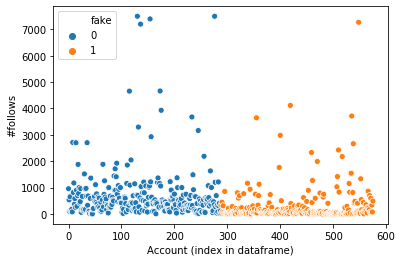

In [174]:
#plt.plot(f_data['#follows'])
ax = sns.scatterplot(x=f_data.index.values, y=f_data['#follows'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

Fake accounts appear follow fewer number of accounts. 

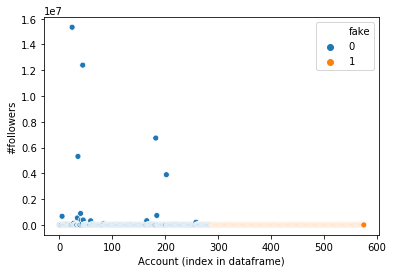

In [175]:
#plt.plot(f_data['#followers'])
ax = sns.scatterplot(x=f_data.index.values, y=f_data['#followers'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

Some real accounts have a significantly large number of followers, while fake accounts do not. 

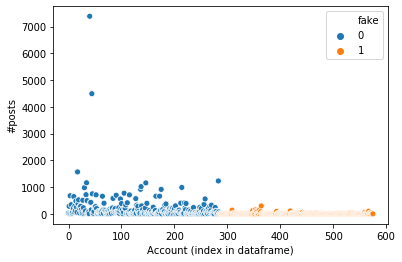

In [176]:
ax = sns.scatterplot(x=f_data.index.values, y=f_data['#posts'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

Real accounts appear to have more number of posts than fake accounts.

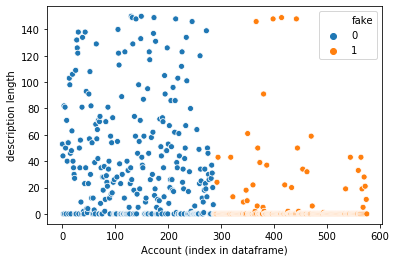

In [177]:
ax = sns.scatterplot(x=f_data.index.values, y=f_data['description length'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

The description length of most real accounts is higher than that of fake accounts

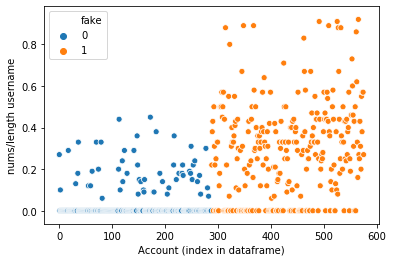

In [178]:
ax = sns.scatterplot(x=f_data.index.values, y=f_data['nums/length username'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

The username lengths of many fake accounts is greater than that of real accounts 

In [179]:
#f_data['private'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Number of accounts')

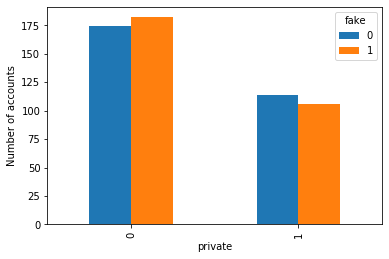

In [180]:
f_data.groupby('private').fake.value_counts().unstack().plot.bar()
plt.ylabel('Number of accounts')

The number of public accounts in the dataset is greater than the number of private accounts. The number of fake public accounts are slightly greater than the number of real public accounts, while the number of fake private accounts are slightly lower than the number of real private accounts. 

Text(0, 0.5, 'Number of accounts')

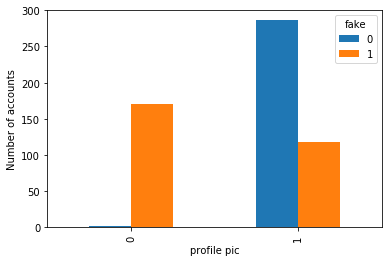

In [181]:
f_data.groupby('profile pic').fake.value_counts().unstack().plot.bar()
plt.ylabel('Number of accounts')

A key observation that can be made here is that most of the accounts without a profile picture are fake. The number of real accounts with a profile picture are greater than twice the number of fake accounts with a profile picture.

Text(0, 0.5, 'Number of accounts')

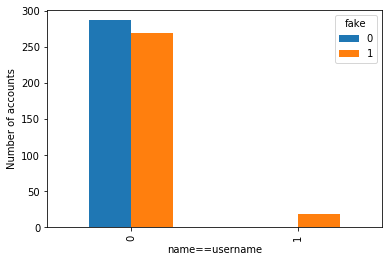

In [182]:
f_data.groupby('name==username').fake.value_counts().unstack().plot.bar()
plt.ylabel('Number of accounts')

Most of the accounts in the given dataset have a username that is different from their name. A small fraction of accounts in the dataset have the same name and username, and all these accounts are fake.

Text(0, 0.5, 'Number of accounts')

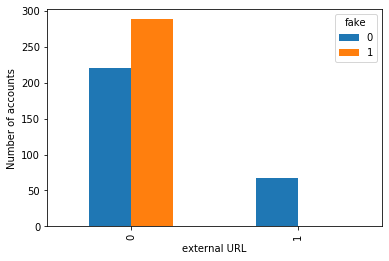

In [183]:
f_data.groupby('external URL').fake.value_counts().unstack().plot.bar()
plt.ylabel('Number of accounts')

Most accounts in the dataset have no external URLs in their profile. The small portion of accounts that have an external URL are genuine accounts. No fake account has linked to any external URL.

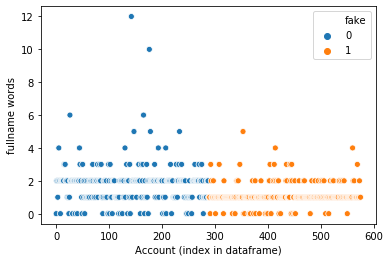

In [184]:
ax = sns.scatterplot(x=f_data.index.values, y=f_data['fullname words'],
              hue=f_data['fake'], data=f_data)
ax.set(xlabel='Account (index in dataframe)')
plt.show()

A possible outlier observed in the plot is that 2 genuine accounts appear to have 10-12 words in their fullname. 

### Random Forest 

In [185]:
X_train, X_valid, Y_train, Y_valid = train_test_split(f_data_features, f_data_labels, test_size=0.3,random_state=109) # 70% training and 30% validation
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [186]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 20 trees
model = RandomForestClassifier(n_estimators=20, 
                               bootstrap = True,
                               max_features = 'sqrt',random_state=2)
# Fit on training data
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict for validation data
Y_pred_valid = model.predict(X_valid)

print(confusion_matrix(Y_valid,Y_pred_valid))
print(classification_report(Y_valid,Y_pred_valid))
print('Accuracy:',accuracy_score(Y_valid,Y_pred_valid))

[[87  3]
 [11 72]]
             precision    recall  f1-score   support

          0       0.89      0.97      0.93        90
          1       0.96      0.87      0.91        83

avg / total       0.92      0.92      0.92       173

Accuracy: 0.9190751445086706


In [188]:
# Predict for test data
Y_pred_test = model.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_test))
print(classification_report(Y_test,Y_pred_test))
print('Accuracy:',accuracy_score(Y_test,Y_pred_test))

[[57  3]
 [ 8 52]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91        60
          1       0.95      0.87      0.90        60

avg / total       0.91      0.91      0.91       120

Accuracy: 0.9083333333333333


#### Visualizing a single tree from the forest

In [189]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[9]
feature_list = list(f_data_features.columns)
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

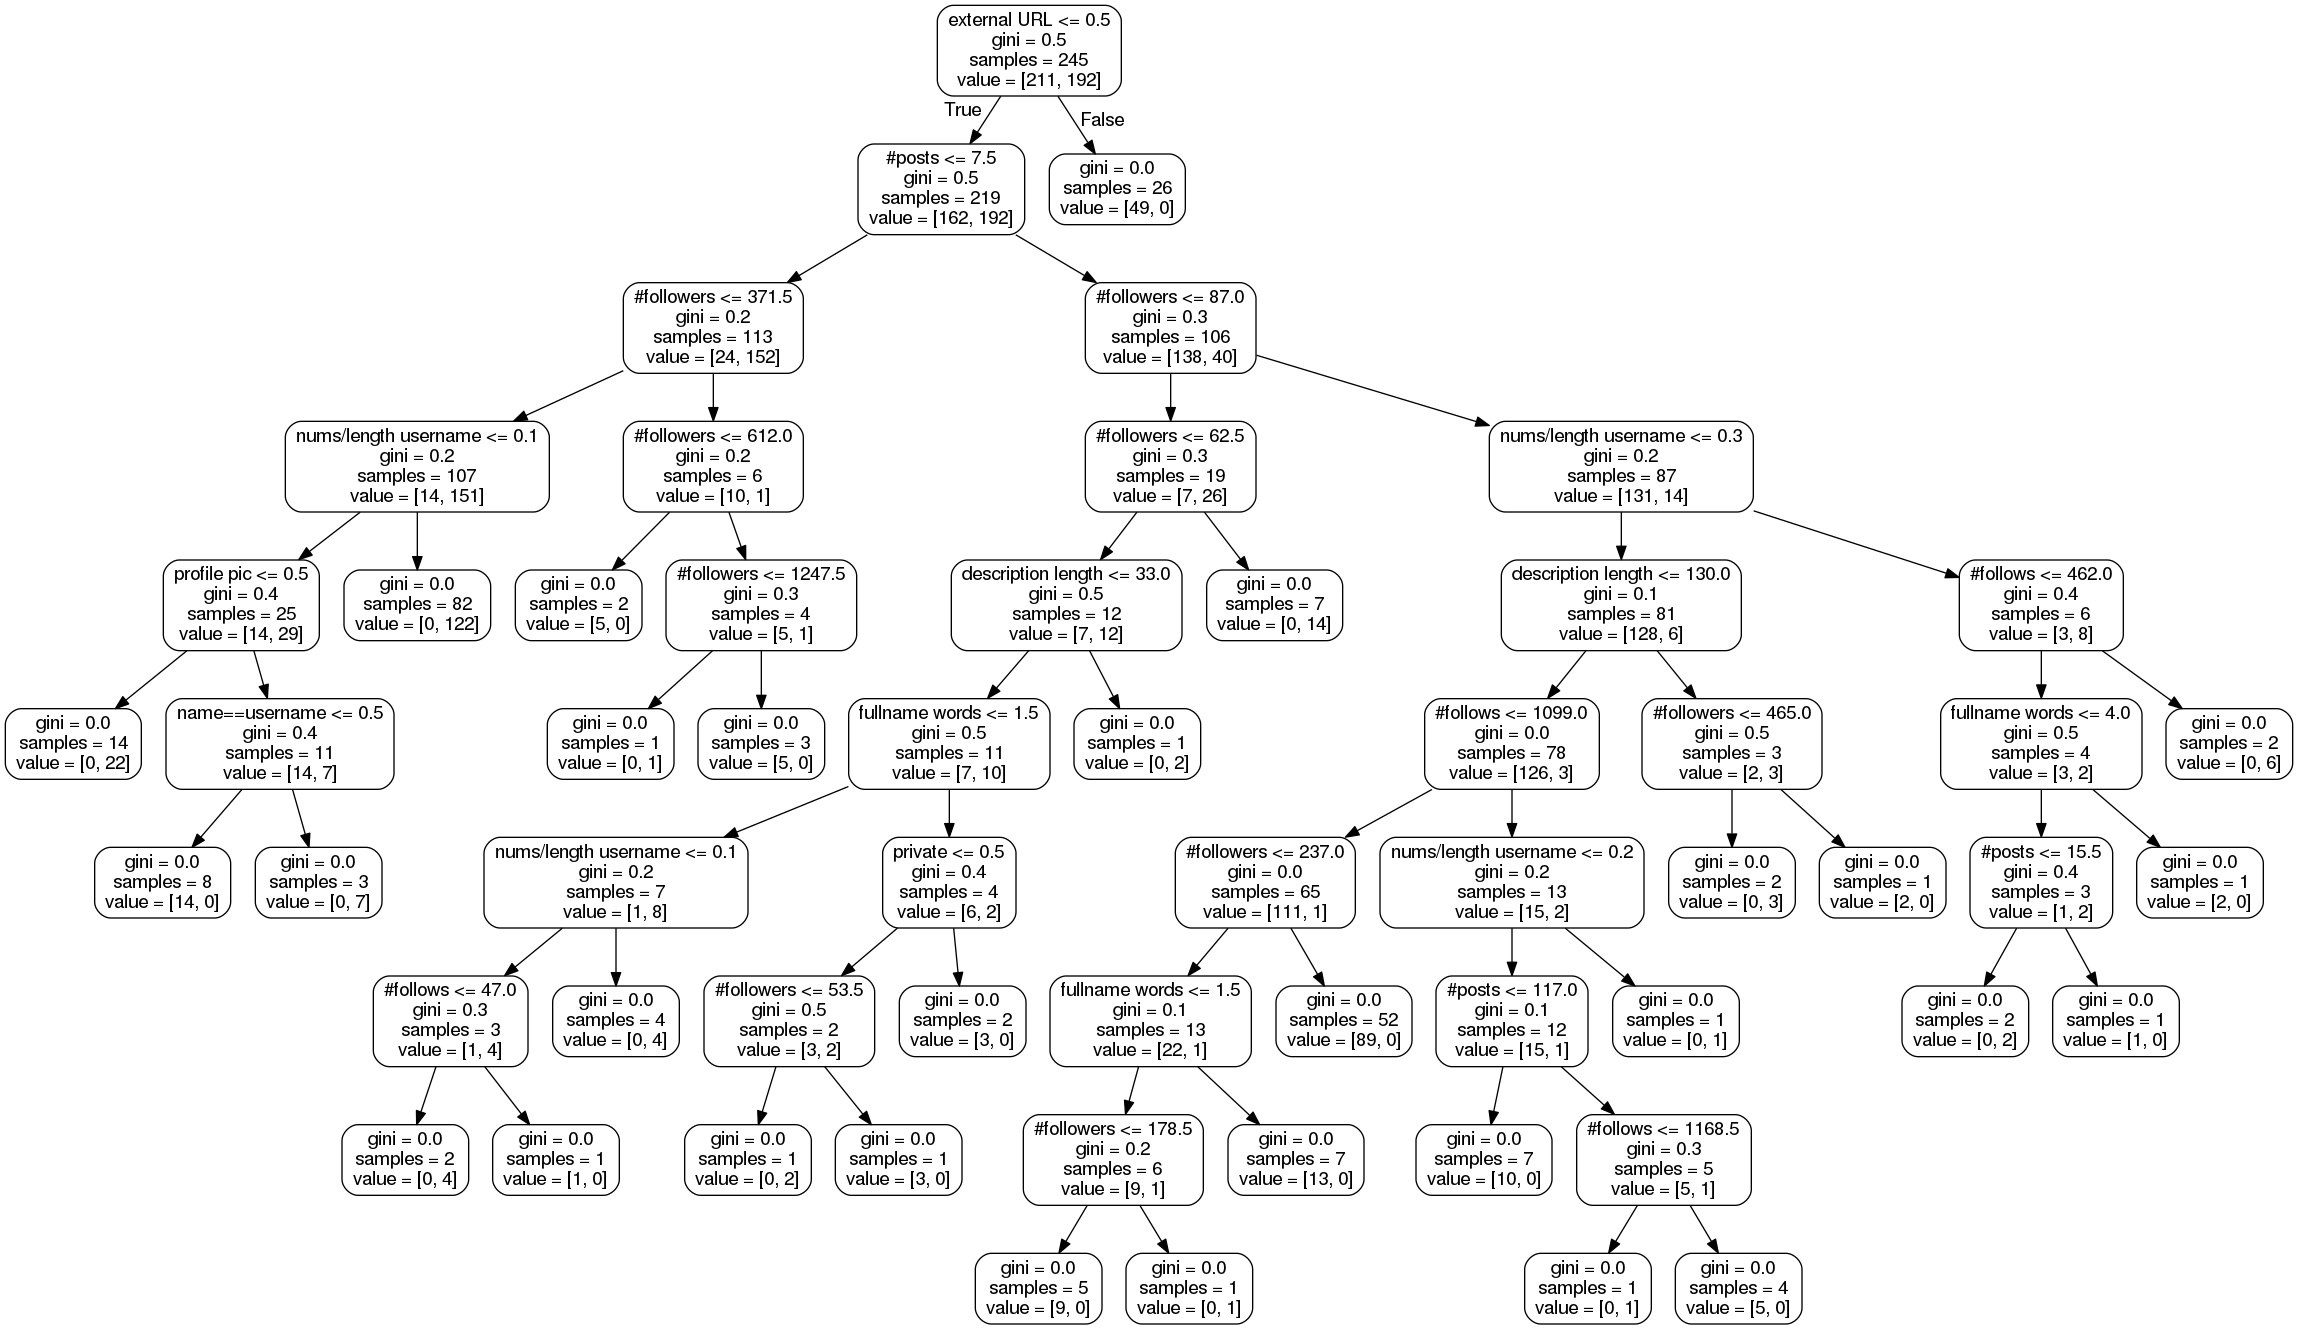

In [190]:
from IPython.display import Image
Image("tree.png")

Each node in the above tree represents a feature whose value is used to make a decision. This tree uses a subset of 245 training samples to make decisions. 20 trees, each utilising a random subset of the training data and a random set of features for learning are put together to form the random forest model.

#### Feature importance

In [191]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: #followers           Importance: 0.35
Variable: #posts               Importance: 0.25
Variable: description length   Importance: 0.1
Variable: profile pic          Importance: 0.09
Variable: nums/length username Importance: 0.09
Variable: #follows             Importance: 0.05
Variable: fullname words       Importance: 0.04
Variable: nums/length fullname Importance: 0.01
Variable: external URL         Importance: 0.01
Variable: private              Importance: 0.01
Variable: name==username       Importance: 0.0


The number of followers and the number of posts are the most important features used by the random forest model to make predictions. This information can be used to select only important features and thereby train a simpler model.

### Concluding remarks on Random Forest Classifier

The random forest classifier is trained with 20 estimators and gives an accuracy of 91% on the test data. 